# AI Security I (2024-1)

### Sangkyun Lee

---

# Chapter 12: Introduction to PyTorch (part 1/2)

- [PyTorch and training performance](#PyTorch-and-training-performance)
  - [Performance challenges](#Performance-challenges)
  - [What is PyTorch?](#What-is-PyTorch?)
  - [How we will learn PyTorch](#How-we-will-learn-PyTorch)
- [First steps with PyTorch](#First-steps-with-PyTorch)
  - [Installing PyTorch](#Installing-PyTorch)
  - [Creating tensors in PyTorch](#Creating-tensors-in-PyTorch)
  - [Manipulating the data type and shape of a tensor](#Manipulating-the-data-type-and-shape-of-a-tensor)
  - [Applying mathematical operations to tensors](#Applying-mathematical-operations-to-tensors)
  - [Split, stack, and concatenate tensors](#Split,-stack,-and-concatenate-tensors)

In [ ]:
# in case PyTorch is not installed | colab
!pip install torch torchvision

## Tensors

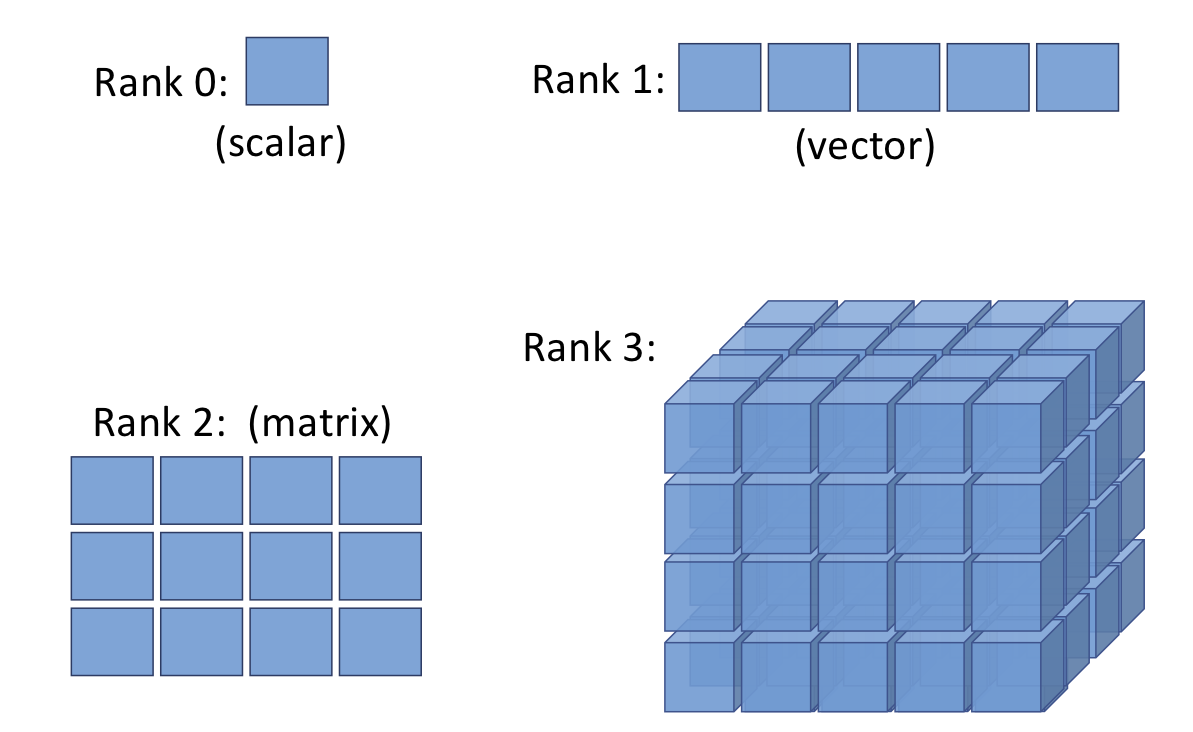

In [2]:
from IPython.display import Image
%matplotlib inline

Image(filename='./figures/12_02.png', width=800) 

### Creating tensors in PyTorch

In [2]:
import numpy as np
import torch

a = [1, 2, 3]
b = np.array([4, 5, 6], dtype=np.int32)

t_a = torch.tensor(a)
t_b = torch.from_numpy(b)

print(t_a)
print(t_b)

tensor([1, 2, 3])
tensor([4, 5, 6], dtype=torch.int32)


#### Ex. Tensor of ones and random numbers

In [3]:
t_ones = torch.ones(2, 3)

t_ones.shape

torch.Size([2, 3])

In [4]:
print(t_ones)

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [5]:
rand_tensor = torch.rand(2,3)

print(rand_tensor)

tensor([[0.7250, 0.1990, 0.8809],
        [0.3521, 0.2624, 0.1694]])


### Manipulating the data type and shape of a tensor

In [6]:
t_a_new = t_a.to(torch.int64)

print(t_a_new.dtype)

torch.int64


#### Transpose (x, dim0, dim1): the given dimensions dim0 and dim1 are swapped.

In [7]:
t = torch.rand(3, 5)

t_tr = torch.transpose(t, 0, 1)
print(t.shape, ' --> ', t_tr.shape)

torch.Size([3, 5])  -->  torch.Size([5, 3])


#### Reshape (creates a new tensor)

In [8]:
t = torch.zeros(30)

t_reshape = t.reshape(5, 6)

print(t_reshape.shape)

torch.Size([5, 6])


#### Sub-tensor

In [9]:
t = torch.rand(3, 5)
t_sub = t[1:2, :4]

print(t.shape, ' --> ', t_sub.shape)

torch.Size([3, 5])  -->  torch.Size([1, 4])


#### squeeze: teturns a tensor with all specified dimensions of input of size 1 removed.

Ex. (A×1×B×C×1×D) --> (A×B×C×D).

In [10]:
t = torch.zeros(1, 2, 1, 4, 1)

t_sqz = torch.squeeze(t)

print(t.shape, ' --> ', t_sqz.shape)

t_sqz = torch.squeeze(t, 2)

print(t.shape, ' --> ', t_sqz.shape)

torch.Size([1, 2, 1, 4, 1])  -->  torch.Size([2, 4])
torch.Size([1, 2, 1, 4, 1])  -->  torch.Size([1, 2, 4, 1])


### Applying mathematical operations to tensors

#### Sampling from Normal distribution

In [64]:
torch.manual_seed(1)

t1 = 2 * torch.rand(5, 2) - 1
t2 = torch.normal(mean=0, std=1, size=(5, 2))

print(t1, t2)

tensor([[ 0.5153, -0.4414],
        [-0.1939,  0.4694],
        [-0.9414,  0.5997],
        [-0.2057,  0.5087],
        [ 0.1390, -0.1224]]) tensor([[ 0.8590,  0.7056],
        [-0.3406, -1.2720],
        [-1.1948,  0.0250],
        [-0.7627,  1.3969],
        [-0.3245,  0.2879]])


#### Mean

In [51]:
t4 = torch.mean(t1, axis=0)
print(t4)

tensor([-0.1373,  0.2028])


#### Multiplication

Elementwise
- **torch.mul(=torch.multiply)**: elementwise multiplication with broadcasting - (Tensor) by (Tensor or Number)

Matrix product
- **torch.mm**: without broadcasting - (2D tensor) by (2D tensor)
- **torch.matmul**: with broadcasting - (Tensor) by (Tensor) with different behaviors depending on the tensor shapes (dot product, matrix product, batched matrix products).


In [65]:
# Elemwise
print('t1=', t1.shape)
print('t2=', t2.shape)
t3 = torch.multiply(t1, t2)
print('t3=',t3.shape)

t1= torch.Size([5, 2])
t2= torch.Size([5, 2])
t3= torch.Size([5, 2])


In [68]:
# Product
print(t1.shape)
print(t2.shape)
#t5 = torch.matmul(t1, t2)
t5 = torch.matmul(t1, torch.transpose(t2, 0, 1))

print(t5.shape)

torch.Size([5, 2])
torch.Size([5, 2])
torch.Size([5, 5])


In [82]:
# Product, broadcasting

t1 = torch.rand(1,3)
t2 = torch.rand(4,3,2)
print(t1.shape)
print(t2.shape)
t5 = torch.matmul(t1, t2)

print(t5)
print(t5.shape)

torch.Size([1, 3])
torch.Size([4, 3, 2])
tensor([[[1.0634, 1.1110]],

        [[0.6380, 1.1367]],

        [[1.7905, 1.6196]],

        [[1.0995, 0.8308]]])
torch.Size([4, 1, 2])


#### Norms

In [16]:
t1 = 2 * torch.rand(5, 2) - 1
norm_t1 = torch.linalg.norm(t1, ord=2, dim=1) #ord=1, 2, float('inf')

print(norm_t1)

tensor([0.9035, 0.7171, 0.8891, 1.0492, 0.1657])


In [17]:
np.sqrt(np.sum(np.square(t1.numpy()), axis=1))

array([0.9035312 , 0.7170635 , 0.8890898 , 1.0491948 , 0.16574197],
      dtype=float32)

### Split, stack, and concatenate tensors

In [18]:
torch.manual_seed(1)

t = torch.rand(6)

print(t)

t_splits = torch.chunk(t, 3)

[item.numpy() for item in t_splits]

tensor([0.7576, 0.2793, 0.4031, 0.7347, 0.0293, 0.7999])


[array([0.7576316 , 0.27931088], dtype=float32),
 array([0.40306926, 0.73468447], dtype=float32),
 array([0.02928156, 0.7998586 ], dtype=float32)]

In [19]:
torch.manual_seed(1)
t = torch.rand(5)

print(t)

t_splits = torch.split(t, split_size_or_sections=[3, 2])
 
[item.numpy() for item in t_splits]

tensor([0.7576, 0.2793, 0.4031, 0.7347, 0.0293])


[array([0.7576316 , 0.27931088, 0.40306926], dtype=float32),
 array([0.73468447, 0.02928156], dtype=float32)]

In [20]:
A = torch.ones(2,3)
B = torch.zeros(2,3)

C = torch.cat([A, B], axis=0)
print(C)
C = torch.cat([A, B], axis=1)
print(C)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [0., 0., 0.],
        [0., 0., 0.]])
tensor([[1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0.]])


In [21]:
A = torch.ones(3)
B = torch.zeros(3)

S = torch.stack([A, B], axis=1)
print(S)

tensor([[1., 0.],
        [1., 0.],
        [1., 0.]])


## Building input pipelines in PyTorch

### Creating a PyTorch DataLoader from existing tensors

In [22]:
from torch.utils.data import DataLoader

t = torch.arange(7, dtype=torch.float32)
data_loader = DataLoader(t)

In [23]:
for item in data_loader:
    print(item)

tensor([0.])
tensor([1.])
tensor([2.])
tensor([3.])
tensor([4.])
tensor([5.])
tensor([6.])


In [24]:
data_loader = DataLoader(t, batch_size=3, drop_last=False)

for i, batch in enumerate(data_loader, 1):
    print(f'batch {i}:', batch)

batch 1: tensor([0., 1., 2.])
batch 2: tensor([3., 4., 5.])
batch 3: tensor([6.])


### Combining two tensors into a joint dataset

In [25]:
from torch.utils.data import Dataset

class JointDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def __len__(self):
        return len(self.x)
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

In [26]:
torch.manual_seed(1)

t_x = torch.rand([4, 3], dtype=torch.float32)
t_y = torch.arange(4)
joint_dataset = JointDataset(t_x, t_y)

# Or use TensorDataset directly
from torch.utils.data import TensorDataset
joint_dataset = TensorDataset(t_x, t_y)

for example in joint_dataset:
    print('  x: ', example[0], 
          '  y: ', example[1])

  x:  tensor([0.7576, 0.2793, 0.4031])   y:  tensor(0)
  x:  tensor([0.7347, 0.0293, 0.7999])   y:  tensor(1)
  x:  tensor([0.3971, 0.7544, 0.5695])   y:  tensor(2)
  x:  tensor([0.4388, 0.6387, 0.5247])   y:  tensor(3)


### Shuffle, batch, and repeat

In [27]:
torch.manual_seed(1)
data_loader = DataLoader(dataset=joint_dataset, batch_size=2, shuffle=True)

for i, batch in enumerate(data_loader, 1):  # 1 for start index
        print(f'batch {i}:', 'x:', batch[0], 
              '\n         y:', batch[1])
        
for epoch in range(2):
    print(f'epoch {epoch+1}')
    for i, batch in enumerate(data_loader, 1):
        print(f'batch {i}:', 'x:', batch[0], 
              '\n         y:', batch[1])

batch 1: x: tensor([[0.3971, 0.7544, 0.5695],
        [0.7576, 0.2793, 0.4031]]) 
         y: tensor([2, 0])
batch 2: x: tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]) 
         y: tensor([1, 3])
epoch 1
batch 1: x: tensor([[0.7576, 0.2793, 0.4031],
        [0.3971, 0.7544, 0.5695]]) 
         y: tensor([0, 2])
batch 2: x: tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]) 
         y: tensor([1, 3])
epoch 2
batch 1: x: tensor([[0.4388, 0.6387, 0.5247],
        [0.3971, 0.7544, 0.5695]]) 
         y: tensor([3, 2])
batch 2: x: tensor([[0.7576, 0.2793, 0.4031],
        [0.7347, 0.0293, 0.7999]]) 
         y: tensor([0, 1])


### Creating a dataset from files on your local storage disk

In [28]:
import pathlib

imgdir_path = pathlib.Path('cat_dog_images')

file_list = sorted([str(path) for path in imgdir_path.glob('*.jpg')])

print(file_list)

['cat_dog_images/cat-01.jpg', 'cat_dog_images/cat-02.jpg', 'cat_dog_images/cat-03.jpg', 'cat_dog_images/dog-01.jpg', 'cat_dog_images/dog-02.jpg', 'cat_dog_images/dog-03.jpg']


Image shape:  (900, 1200, 3)
Image shape:  (900, 1200, 3)
Image shape:  (900, 742, 3)
Image shape:  (800, 1200, 3)
Image shape:  (800, 1200, 3)
Image shape:  (900, 1200, 3)


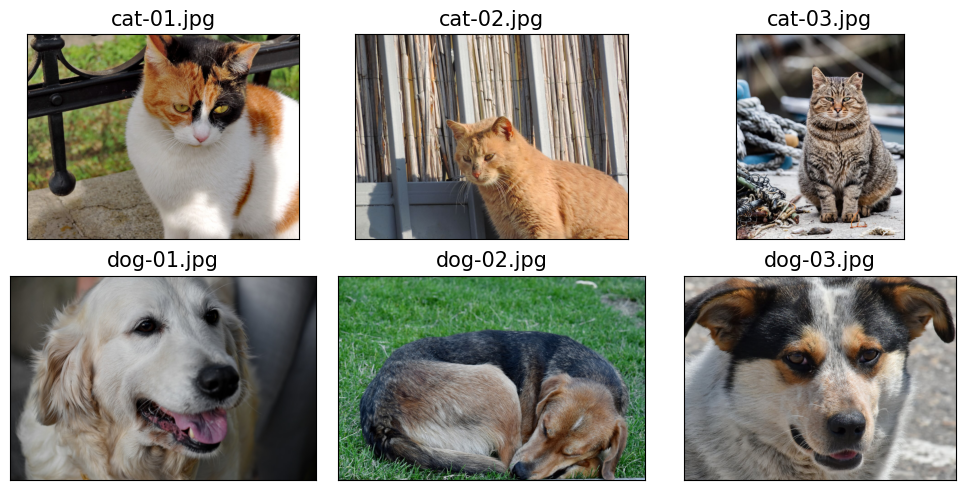

In [30]:
import matplotlib.pyplot as plt
import os
from PIL import Image


fig = plt.figure(figsize=(10, 5))
for i, file in enumerate(file_list):
    img = Image.open(file)
    print('Image shape: ', np.array(img).shape)
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(img)
    ax.set_title(os.path.basename(file), size=15)
    
plt.tight_layout()
plt.show()

In [31]:
labels = [1 if 'dog' in os.path.basename(file) else 0
          for file in file_list]
print(labels)

[0, 0, 0, 1, 1, 1]


In [32]:
class ImageDataset(Dataset):
    def __init__(self, file_list, labels):
        self.file_list = file_list
        self.labels = labels

    def __getitem__(self, index):
        file = self.file_list[index]      
        label = self.labels[index]
        return file, label

    def __len__(self):
        return len(self.labels)
    
image_dataset = ImageDataset(file_list, labels)
for file, label in image_dataset:
    print(file, label)

cat_dog_images/cat-01.jpg 0
cat_dog_images/cat-02.jpg 0
cat_dog_images/cat-03.jpg 0
cat_dog_images/dog-01.jpg 1
cat_dog_images/dog-02.jpg 1
cat_dog_images/dog-03.jpg 1


#### Torchvision.transforms

#! pip install torchvision

In [38]:
import torchvision.transforms as transforms

class ImageDataset(Dataset):
    def __init__(self, file_list, labels, transform=None):
        self.file_list = file_list
        self.labels = labels
        self.transform = transform
    def __getitem__(self, index):
        img = Image.open(self.file_list[index])        
        if self.transform is not None:
            img = self.transform(img)
        label = self.labels[index]
        return img, label
    def __len__(self):
        return len(self.labels)

img_height, img_width = 80, 120
    
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((img_height, img_width)),
])
    
image_dataset = ImageDataset(file_list, labels, transform)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


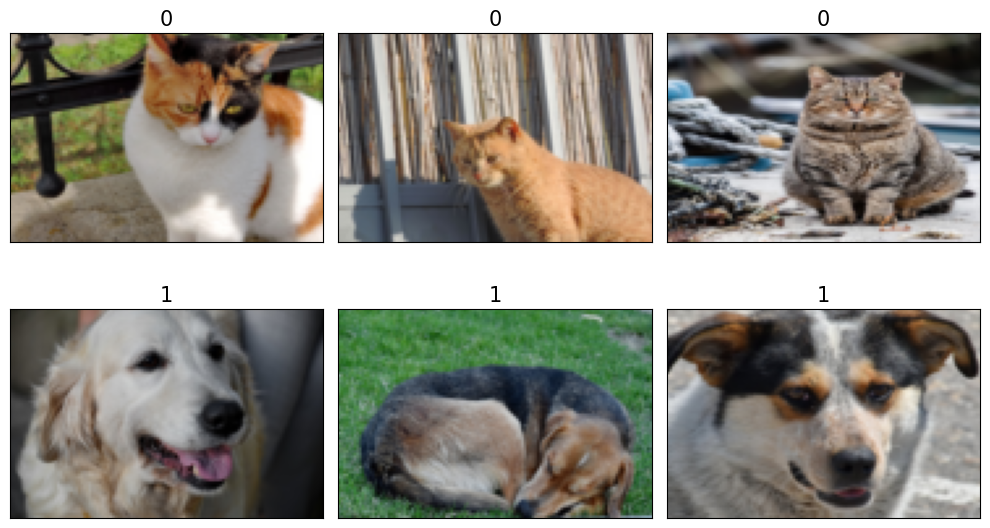

In [40]:
fig = plt.figure(figsize=(10, 6))
for i, example in enumerate(image_dataset):
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(example[0].numpy().transpose((1, 2, 0)))
    ax.set_title(f'{example[1]}', size=15)
    
plt.tight_layout()
plt.show()

### Fetching available datasets from the torchvision.datasets library

**Fetching CelebA dataset**

---

1. Downloading the image files manually

    - You can try setting `download=True` below. If this results in a `BadZipfile` error, we recommend downloading the `img_align_celeba.zip` file manually from http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html. In the Google Drive folder, you can find it under the `Img` folder as shown below:

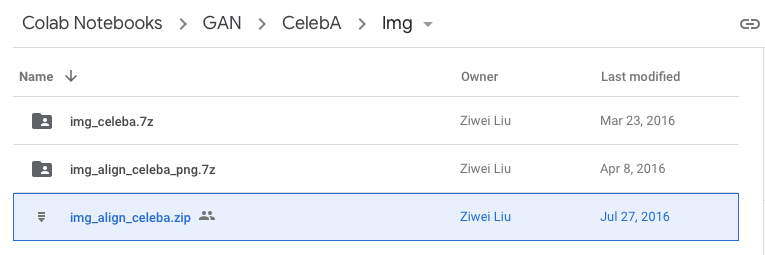

In [3]:
Image(filename='./figures/gdrive-download-location-1.png', width=800) 

- You can also try this direct  link: https://drive.google.com/file/d/0B7EVK8r0v71pZjFTYXZWM3FlRnM/view?usp=sharing&resourcekey=0-dYn9z10tMJOBAkviAcfdyQ
- After downloading, please put this file into the `./celeba` subolder and unzip it.

2. Next,  you need to download the annotation files and put them into the same `./celeba` subfolder. The annotation files can be found under `Anno`:

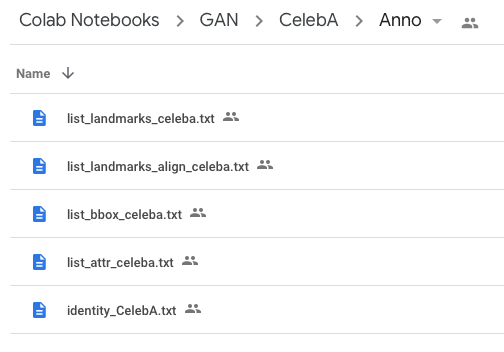

In [5]:
Image(filename='./figures/gdrive-download-location-2.png', width=600) 

- direct links are provided below:
  - [identity_CelebA.txt](https://drive.google.com/file/d/1_ee_0u7vcNLOfNLegJRHmolfH5ICW-XS/view?usp=sharing)
  - [list_attr_celeba.txt](https://drive.google.com/file/d/0B7EVK8r0v71pblRyaVFSWGxPY0U/view?usp=sharing&resourcekey=0-YW2qIuRcWHy_1C2VaRGL3Q)
  - [list_bbox_celeba.txt](https://drive.google.com/file/d/0B7EVK8r0v71pbThiMVRxWXZ4dU0/view?usp=sharing&resourcekey=0-z-17UMo1wt4moRL2lu9D8A)
  - [list_landmarks_align_celeba.txt](https://drive.google.com/file/d/0B7EVK8r0v71pd0FJY3Blby1HUTQ/view?usp=sharing&resourcekey=0-aFtzLN5nfdhHXpAsgYA8_g)
  - [list_landmarks_celeba.txt](https://drive.google.com/file/d/0B7EVK8r0v71pTzJIdlJWdHczRlU/view?usp=sharing&resourcekey=0-49BtYuqFDomi-1v0vNVwrQ)

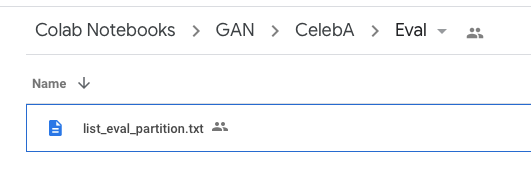

In [6]:
Image(filename='./figures/gdrive-download-location-3.png', width=500) 

3. Lastly, you need to download the file `list_eval_partition.txt` and place it under `./celeba`:

- [list_eval_partition.txt](https://drive.google.com/file/d/0B7EVK8r0v71pY0NSMzRuSXJEVkk/view?usp=sharing&resourcekey=0-i4TGCi_51OtQ5K9FSp4EDg)

After completing steps 1-3 above, please ensure you have the following files in your `./celeba` subfolder, and the files are non-empty (that is, they have similar file sizes as shown below):

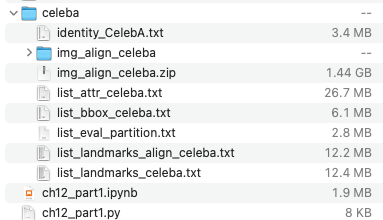

In [7]:
Image(filename='./figures/celeba-files.png', width=500) 

---

In [86]:
import torchvision

image_path = '~/datasets/'
celeba_dataset = torchvision.datasets.CelebA(image_path, split='train', target_type='attr', download=False)

assert isinstance(celeba_dataset, torch.utils.data.Dataset)

In [87]:
example = next(iter(celeba_dataset))
print(example)

(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=178x218 at 0x153844ED0>, tensor([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1]))


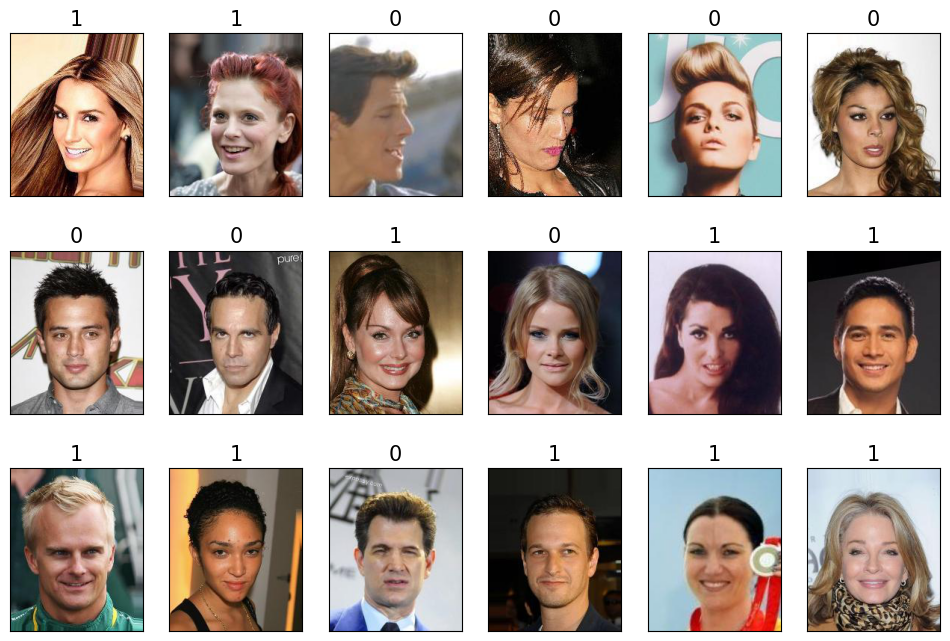

In [88]:
from itertools import islice
fig = plt.figure(figsize=(12, 8))
for i, (image, attributes) in islice(enumerate(celeba_dataset), 18):
    ax = fig.add_subplot(3, 6, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(image)
    ax.set_title(f'{attributes[31]}', size=15)
    
plt.show()

(<PIL.Image.Image image mode=L size=28x28 at 0x151715190>, 5)


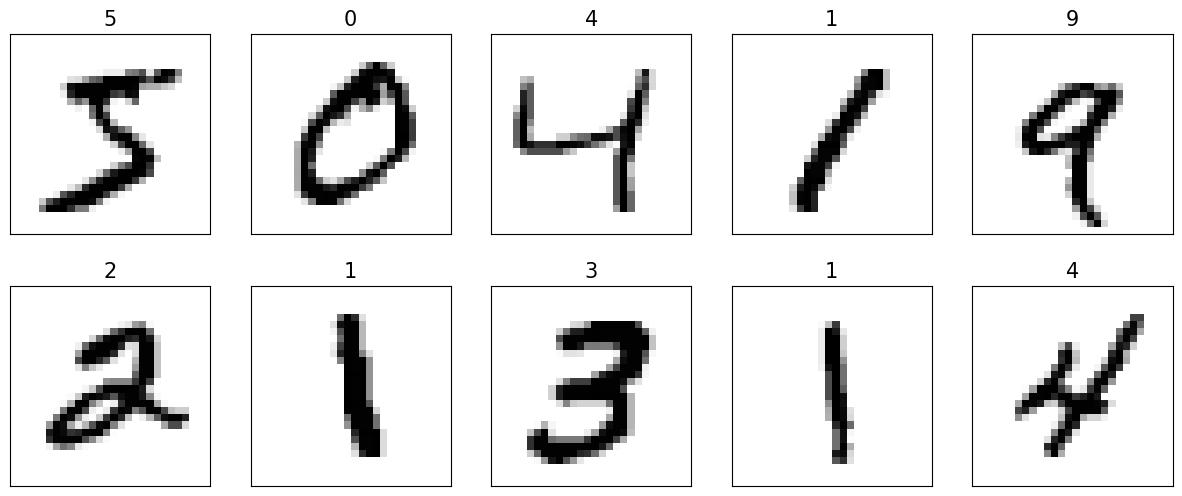

In [90]:
mnist_dataset = torchvision.datasets.MNIST(image_path, 'train', download=False)

assert isinstance(mnist_dataset, torch.utils.data.Dataset)

example = next(iter(mnist_dataset))
print(example)

fig = plt.figure(figsize=(15, 6))
for i, (image, label) in islice(enumerate(mnist_dataset), 10):
    ax = fig.add_subplot(2, 5, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(image, cmap='gray_r')
    ax.set_title(f'{label}', size=15)

plt.show()